CS302(AI)
AI-VISIONARY

Consider a binary bandit with two rewards {1-success, 0-failure}.  The bandit returns 1 or 0 for the action that you select, i.e. 1 or 2.  The rewards are stochastic (but stationary).  Use an epsilon-greedy algorithm discussed in class and decide upon the action to take for maximizing the expected reward.  There are two binary bandits named binaryBanditA.m and binaryBanditB.m are waiting for you.


In [1]:
import numpy as np

In [2]:
import numpy as np

# Define the bandits as functions that return either 1 or 0
def binaryBanditA(action):
    if action == 1:
        return np.random.binomial(1, 0.9)
    else:
        return np.random.binomial(1, 0.1)

def binaryBanditB(action):
    if action == 1:
        return np.random.binomial(1, 0.8)
    else:
        return np.random.binomial(1, 0.2)

# Set the number of trials and time steps
numTrials = 1000
numSteps = 100

# Initialize the q-values for each action to zero
qA = np.zeros(2)
qB = np.zeros(2)

# Choose an epsilon value between 0 and 1
epsilon = 0.1

# Repeat for a fixed number of trials
for i in range(numTrials):
    # Initialize the rewards for each bandit
    rewardsA = np.zeros(numSteps)
    rewardsB = np.zeros(numSteps)
    
    # Repeat for each time step
    for j in range(numSteps):
        # Choose an action for bandit A
        if np.random.uniform() > epsilon:
            actionA = np.argmax(qA)
        else:
            actionA = np.random.randint(2)
        
        # Choose an action for bandit B
        if np.random.uniform() > epsilon:
            actionB = np.argmax(qB)
        else:
            actionB = np.random.randint(2)
        
        # Observe the rewards for each bandit
        rewardA = binaryBanditA(actionA)
        rewardB = binaryBanditB(actionB)
        
        # Update the q-values for each bandit
        qA[actionA] = qA[actionA] + (rewardA - qA[actionA])/j
        qB[actionB] = qB[actionB] + (rewardB - qB[actionB])/j
        
        # Record the rewards for each bandit
        rewardsA[j] = rewardA
        rewardsB[j] = rewardB
    
    # Print the average rewards for each bandit
    print("Trial {}: Bandit A: {:.2f}, Bandit B: {:.2f}".format(i+1, np.mean(rewardsA), np.mean(rewardsB)))


C:\Users\navee\AppData\Local\Temp\ipykernel_10868\4132688401.py:52: RuntimeWarning: invalid value encountered in scalar divide
  qA[actionA] = qA[actionA] + (rewardA - qA[actionA])/j
C:\Users\navee\AppData\Local\Temp\ipykernel_10868\4132688401.py:53: RuntimeWarning: invalid value encountered in scalar divide
  qB[actionB] = qB[actionB] + (rewardB - qB[actionB])/j
C:\Users\navee\AppData\Local\Temp\ipykernel_10868\4132688401.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  qB[actionB] = qB[actionB] + (rewardB - qB[actionB])/j
C:\Users\navee\AppData\Local\Temp\ipykernel_10868\4132688401.py:53: RuntimeWarning: invalid value encountered in scalar add
  qB[actionB] = qB[actionB] + (rewardB - qB[actionB])/j


Trial 1: Bandit A: 0.15, Bandit B: 0.25
Trial 2: Bandit A: 0.09, Bandit B: 0.22
Trial 3: Bandit A: 0.15, Bandit B: 0.26
Trial 4: Bandit A: 0.13, Bandit B: 0.22
Trial 5: Bandit A: 0.14, Bandit B: 0.24
Trial 6: Bandit A: 0.10, Bandit B: 0.16
Trial 7: Bandit A: 0.18, Bandit B: 0.28
Trial 8: Bandit A: 0.12, Bandit B: 0.27
Trial 9: Bandit A: 0.18, Bandit B: 0.24
Trial 10: Bandit A: 0.11, Bandit B: 0.24
Trial 11: Bandit A: 0.10, Bandit B: 0.27
Trial 12: Bandit A: 0.14, Bandit B: 0.27
Trial 13: Bandit A: 0.10, Bandit B: 0.25
Trial 14: Bandit A: 0.09, Bandit B: 0.17
Trial 15: Bandit A: 0.14, Bandit B: 0.17
Trial 16: Bandit A: 0.12, Bandit B: 0.26
Trial 17: Bandit A: 0.11, Bandit B: 0.32
Trial 18: Bandit A: 0.10, Bandit B: 0.21
Trial 19: Bandit A: 0.13, Bandit B: 0.22
Trial 20: Bandit A: 0.17, Bandit B: 0.24
Trial 21: Bandit A: 0.14, Bandit B: 0.17
Trial 22: Bandit A: 0.09, Bandit B: 0.24
Trial 23: Bandit A: 0.17, Bandit B: 0.21
Trial 24: Bandit A: 0.06, Bandit B: 0.25
Trial 25: Bandit A: 0.20,

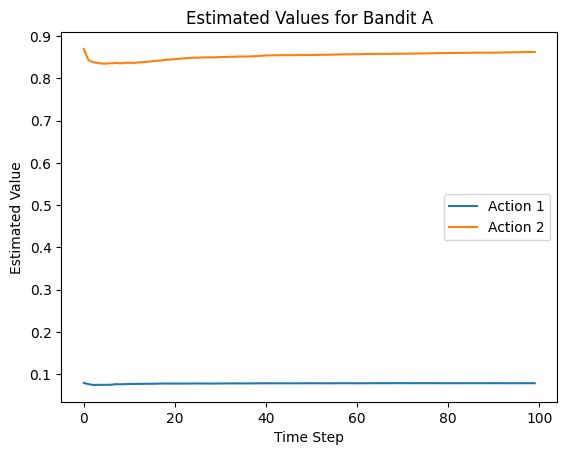

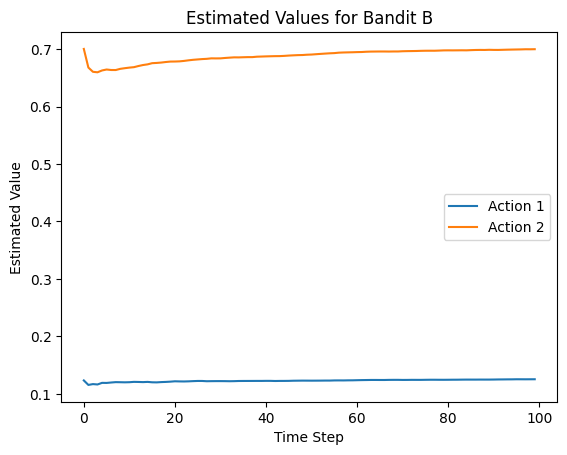

In [3]:
import matplotlib.pyplot as plt

# Set the number of trials and time steps
numTrials = 1000
numSteps = 100

# Initialize the q-values for each action to zero
qA = np.zeros(2)
qB = np.zeros(2)

# Choose an epsilon value between 0 and 1
epsilon = 0.1

# Initialize the arrays to store the q-values over time
qA_over_time = np.zeros((numTrials, numSteps, 2))
qB_over_time = np.zeros((numTrials, numSteps, 2))

# Repeat for a fixed number of trials
for i in range(numTrials):
    # Repeat for each time step
    for j in range(numSteps):
        # Choose an action for bandit A
        if np.random.uniform() > epsilon:
            actionA = np.argmax(qA)
        else:
            actionA = np.random.randint(2)
        
        # Choose an action for bandit B
        if np.random.uniform() > epsilon:
            actionB = np.argmax(qB)
        else:
            actionB = np.random.randint(2)
        
        # Observe the rewards for each bandit
        rewardA = binaryBanditA(actionA)
        rewardB = binaryBanditB(actionB)
        
        # Update the q-values for each bandit
        qA[actionA] = qA[actionA] + (rewardA - qA[actionA])/(j+1)
        qB[actionB] = qB[actionB] + (rewardB - qB[actionB])/(j+1)
        
        # Record the q-values for each bandit at this time step
        qA_over_time[i,j,:] = qA
        qB_over_time[i,j,:] = qB
    
# Calculate the mean q-values over time for each action for each bandit
mean_qA_over_time = np.mean(qA_over_time, axis=0)
mean_qB_over_time = np.mean(qB_over_time, axis=0)

# Plot the estimated values for each action for each bandit over time
plt.plot(mean_qA_over_time[:,0], label='Action 1')
plt.plot(mean_qA_over_time[:,1], label='Action 2')
plt.title('Estimated Values for Bandit A')
plt.xlabel('Time Step')
plt.ylabel('Estimated Value')
plt.legend()
plt.show()

plt.plot(mean_qB_over_time[:,0], label='Action 1')
plt.plot(mean_qB_over_time[:,1], label='Action 2')
plt.title('Estimated Values for Bandit B')
plt.xlabel('Time Step')
plt.ylabel('Estimated Value')
plt.legend()
plt.show()
